In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import scipy.io
import anndata as ad

In [45]:
regions = ['EC', 'ITG', 'PFC', 'V1', 'V2', 'cross_region']

In [59]:
for region in regions:
    print(region)
    path = '/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/' + region + '/'
    
    # read data 
    metadata = pd.read_csv(f'{path}2024-10-29_Microglia_metadata.csv', index_col = 0, dtype={3: str, 6: str})
    matrix = scipy.io.mmread(f'{path}2024-10-29_Microglia_matrix.mtx').tocsc()
    row_annotations = pd.read_csv(f'{path}2024-10-29_Microglia_row-annotation.txt', sep="\t", header=None)
    cell_annotations = pd.read_csv(f'{path}2024-10-29_Microglia_cell-annotation.txt', sep="\t", header=None)
    
    # construct adata 
    adata = ad.AnnData(X=matrix.T)
    adata.obs_names = cell_annotations.values.flatten()
    for key, value in metadata.items():
        adata.obs[key] = value.values 
    adata.var_names = row_annotations.values.flatten() 

    print(adata)
    adata.write(f'{path}microglia_{region}.h5ad')

EC
AnnData object with n_obs × n_vars = 68662 × 36601
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
ITG
AnnData object with n_obs × n_vars = 65800 × 33423
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
PFC
AnnData object with n_obs × n_vars = 75740 × 33522
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
V1
AnnData object with n_obs × n_vars = 60946 × 33395
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
V2
AnnData object with n_obs × n_vars = 66309 × 33364
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
cross_region
AnnData object with n_obs × n_vars = 48217 × 36601
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain reg

In [62]:
# Load each AnnData object (replace paths with actual paths to your data)
adata_ec = ad.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/EC/microglia_EC.h5ad")
adata_itg = ad.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/ITG/microglia_ITG.h5ad")
adata_pfc = ad.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/PFC/microglia_PFC.h5ad")
adata_v1 = ad.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/V1/microglia_V1.h5ad")
adata_v2 = ad.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/V2/microglia_V2.h5ad")

# Step 1: Find mutual genes
# Get the gene names (variable names) for each AnnData object
genes_ec = set(adata_ec.var_names)
genes_itg = set(adata_itg.var_names)
genes_pfc = set(adata_pfc.var_names)
genes_v1 = set(adata_v1.var_names)
genes_v2 = set(adata_v2.var_names)

# Find the intersection of all gene sets
mutual_genes = genes_ec & genes_itg & genes_pfc & genes_v1 & genes_v2
mutual_genes = list(mutual_genes)  # Convert to list for indexing

# Step 2: Subset each AnnData object to retain only the mutual genes
adata_ec = adata_ec[:, mutual_genes]
adata_itg = adata_itg[:, mutual_genes]
adata_pfc = adata_pfc[:, mutual_genes]
adata_v1 = adata_v1[:, mutual_genes]
adata_v2 = adata_v2[:, mutual_genes]

# Step 3: Concatenate all AnnData objects along observations (cells)
adata_combined = ad.concat([adata_ec, adata_itg, adata_pfc, adata_v1, adata_v2], axis=0)


In [67]:
adata_combined.write("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/combined_microglia.h5ad")

In [2]:
adata_combined = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/combined_microglia.h5ad")
adata_combined

AnnData object with n_obs × n_vars = 337457 × 32711
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'

In [66]:
print(adata_combined.obs['Pathology Stage'].unique())
print(adata_combined.obs['Sex'].unique())
print(adata_combined.obs['Braak'].unique())
print(adata_combined.obs['Microglia Subclusters'].unique())
print(adata_combined.obs['Donor ID'].unique())
print(adata_combined.obs['APOE'].unique())
print(adata_combined.obs['Brain region'].unique())
print(adata_combined.obs['CERAD'].unique())

[1 4 3 2]
['F', 'M']
Categories (2, object): ['F', 'M']
['II', 'VI', 'V', 'III', 'unk', '0', 'I']
Categories (7, object): ['0', 'I', 'II', 'III', 'V', 'VI', 'unk']
[ 0  2  5  1  3  4 12  6  7 13  8  9 10 11 14]
[2068 2122 1636 1845 2019 1854 2233 2015 2225 2112 2223 2191 1926 2132
 2018 2021 1906 2259 2097 1628 1872 2219 2169 2203 1907 2057 1669 1821
 1703 2232 1886 1837]
['3/3', '3/4', '2/3', '2/2', '4/4', NaN]
Categories (5, object): ['2/2', '2/3', '3/3', '3/4', '4/4']
['EC', 'ITG', 'PFC', 'V1', 'V2']
Categories (5, object): ['EC', 'ITG', 'PFC', 'V1', 'V2']
['none', 'frequent', 'moderate', 'sparse']
Categories (4, object): ['frequent', 'moderate', 'none', 'sparse']


In [4]:
adata_combined.layers['counts'] = adata_combined.X.copy()

In [5]:
adata_combined.obs['Donor ID'] = adata_combined.obs['Donor ID'].astype(str)
adata_combined.obs['Pathology Stage'] = adata_combined.obs['Pathology Stage'].astype(str)
adata_combined.obs['Microglia Subclusters'] = adata_combined.obs['Microglia Subclusters'].astype(str)

In [6]:
sc.pp.normalize_total(adata_combined)
sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined)
sc.pp.pca(adata_combined, mask_var="highly_variable")
sc.pp.neighbors(adata_combined)
sc.tl.umap(adata_combined)

/home/icb/zihe.zheng/miniconda3/envs/scanpy2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


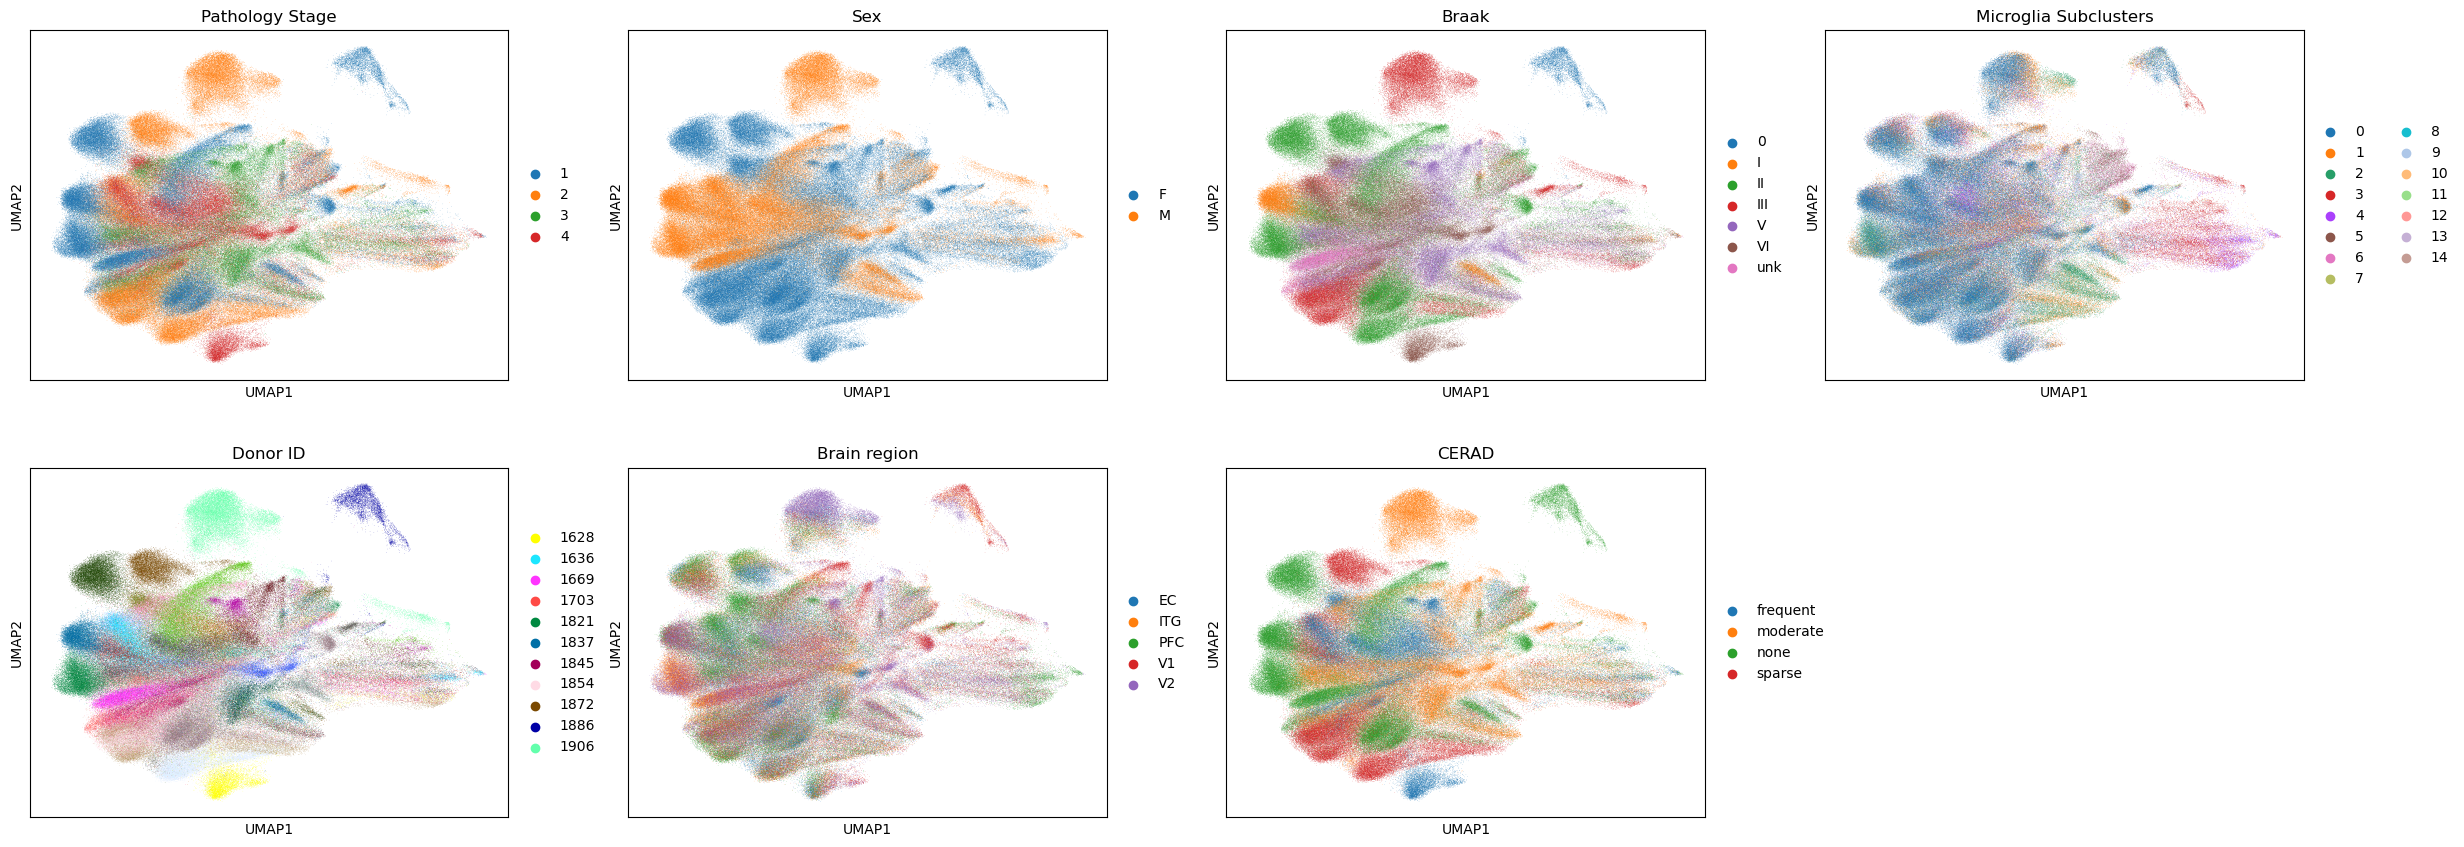

In [7]:
sc.pl.umap(adata_combined, color = ['Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'Brain region', 'CERAD'])

In [8]:
adata_combined.write("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/combined_microglia_processed.h5ad")

In [11]:
adata_combined.obs['APOE_rename'] = adata_combined.obs['APOE']

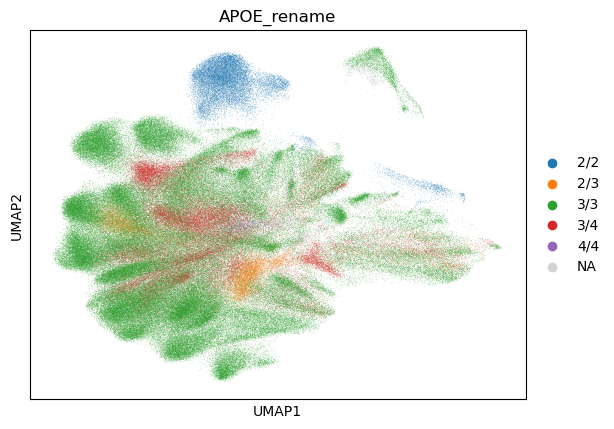

In [12]:
sc.pl.umap(adata_combined, color = ['APOE_rename'])

In [3]:
adata_combined = sc.read_h5ad("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/hyman/microglia/combined_microglia_processed.h5ad")

In [4]:
adata_combined

AnnData object with n_obs × n_vars = 337457 × 32711
    obs: 'Pathology Stage', 'Sex', 'Braak', 'Microglia Subclusters', 'Donor ID', 'APOE', 'Brain region', 'CERAD'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Braak_colors', 'Brain region_colors', 'CERAD_colors', 'Donor ID_colors', 'Microglia Subclusters_colors', 'Pathology Stage_colors', 'Sex_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
sc.pl.umap(adata_combined, color = ['Donor ID'], frameon=False, vmax="p99")